# ATMS 597: Project 5 - Classification

Group D: Joyce Yang, Yang Lu, Lina Rivelli-Zea

Model 1: Logistic Regression classification with default values

UIUC - April, 2020

REFERENCES

Notebook: https://colab.research.google.com/drive/1Zqf6bIHAMROxYaeSTCIAQQmfaDDpPfWp#scrollTo=0kWn-CNvaHUJ

Example: https://www.kaggle.com/akdagmelih/rain-prediction-logistic-regression-example

Book: Chopra R. et. al (2019). Data Science in Python, Chapter 3 (95-133), www.packt.com

Brier: https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/

In [1]:
pwd

'D:\\GitHub\\joyceee916\\ATMS-597-SP-2020-Project-5'

# Setup the model

In [2]:
# Setup 1
!pip install metpy
!pip install metar

In [3]:
# Setup 2

!pip install scipy
!pip install tensorflow
!pip install keras

In [4]:
# Setup 3
!pip install scikit-image
!pip install netCDF4
!pip install pyproj
!pip install scikit-learn
!pip install opencv-python

In [5]:
# Setup 4
!pip install matplotlib

In [6]:
# Setup 5
!pip install shapely
!pip install geopy
!pip install metpy
!pip install descartes

In [163]:
# Import libraries

%matplotlib inline
import sys
import copy
import warnings
import matplotlib.pyplot as pyplot
import pandas as pd
import io 
import numpy as np
from pandas.tseries.offsets import MonthEnd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error
from math import sqrt
import os

In [164]:
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join("./", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

# Input data into pandas dataframe

Data: KGRB (WI) 5-minute Automated Surface Observation System data available from NCDC 
    
Read 5-min ASOS observations from 2000-2020 data period

In [8]:
# KGRB_precip=pd.read_csv('/data/keeling/a/ler5/python/pyradartutorials/00_introduction/KGRB_precip.csv')
#KGRB_precip=pd.read_csv('KGRB_precip.csv')
KGRB_precip=pd.read_csv('./KGRB_precip.csv')

In [9]:
print(KGRB_precip.columns.values)

['station_id' 'latitude' 'longitude' 'elevation' 'date_time'
 'wind_direction' 'wind_speed' 'current_wx1' 'current_wx2' 'current_wx3'
 'low_cloud_type' 'low_cloud_level' 'medium_cloud_type'
 'medium_cloud_level' 'high_cloud_type' 'high_cloud_level'
 'highest_cloud_type' 'highest_cloud_level' 'cloud_coverage'
 'air_temperature' 'dew_point_temperature' 'altimeter' 'present_weather'
 'past_weather' 'past_weather2' 'air_pressure_at_sea_level'
 'eastward_wind' 'northward_wind']


In [10]:
KGRB_precip

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
0,KGRB,44.48,-88.13,208.0,2000-01-01 00:00:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.517541,2.736161
1,KGRB,44.48,-88.13,208.0,2000-01-01 00:05:00,260.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.878462,1.389185
2,KGRB,44.48,-88.13,208.0,2000-01-01 00:10:00,260.0,9.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,8.863270,1.562834
3,KGRB,44.48,-88.13,208.0,2000-01-01 00:15:00,250.0,7.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,6.577848,2.394141
4,KGRB,44.48,-88.13,208.0,2000-01-01 00:20:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.85,71,0,0,NaN,7.517541,2.736161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162303,KGRB,44.48,-88.13,208.0,2020-03-31 14:10:00,20.0,13.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-4.446262,-12.216004
162304,KGRB,44.48,-88.13,208.0,2020-03-31 14:15:00,20.0,14.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-4.788282,-13.155697
162305,KGRB,44.48,-88.13,208.0,2020-03-31 14:20:00,30.0,13.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-6.500000,-11.258330
162306,KGRB,44.48,-88.13,208.0,2020-03-31 14:25:00,30.0,14.0,-SN,BR,NaN,...,8,1.0,-1.0,30.13,71,10,0,NaN,-7.000000,-12.124356


Read 5-min observations from 1-year data period (for developing code purposes)

In [11]:
precip2000=pd.read_csv('./df2000.csv')

In [12]:
# precip2001=pd.read_csv('./df2001.csv')

In [13]:
print(precip2000.columns.values)

['station_id' 'latitude' 'longitude' 'elevation' 'date_time'
 'wind_direction' 'wind_speed' 'current_wx1' 'current_wx2' 'current_wx3'
 'low_cloud_type' 'low_cloud_level' 'medium_cloud_type'
 'medium_cloud_level' 'high_cloud_type' 'high_cloud_level'
 'highest_cloud_type' 'highest_cloud_level' 'cloud_coverage'
 'air_temperature' 'dew_point_temperature' 'altimeter' 'present_weather'
 'past_weather' 'past_weather2' 'air_pressure_at_sea_level'
 'eastward_wind' 'northward_wind']


In [14]:
precip2000

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
0,KGRB,44.48,-88.13,208.0,2000-01-01 00:00:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.517541,2.736161
1,KGRB,44.48,-88.13,208.0,2000-01-01 00:05:00,260.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,7.878462,1.389185
2,KGRB,44.48,-88.13,208.0,2000-01-01 00:10:00,260.0,9.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,8.863270,1.562834
3,KGRB,44.48,-88.13,208.0,2000-01-01 00:15:00,250.0,7.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.84,71,0,0,NaN,6.577848,2.394141
4,KGRB,44.48,-88.13,208.0,2000-01-01 00:20:00,250.0,8.0,-SN,NaN,NaN,...,8,-5.0,-9.0,29.85,71,0,0,NaN,7.517541,2.736161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,KGRB,44.48,-88.13,208.0,2000-12-29 18:40:00,30.0,13.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.500000,-11.258330
9742,KGRB,44.48,-88.13,208.0,2000-12-29 18:45:00,30.0,11.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-5.500000,-9.526279
9743,KGRB,44.48,-88.13,208.0,2000-12-29 18:50:00,30.0,12.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.000000,-10.392305
9744,KGRB,44.48,-88.13,208.0,2000-12-29 18:55:00,30.0,13.0,-SN,BR,NaN,...,8,-5.0,-7.0,30.05,71,10,0,NaN,-6.500000,-11.258330


In [15]:
# Datetime index for csv file
precip2000.index = pd.to_datetime(precip2000.date_time)

Read features of categorical variable for classification

In [16]:
# Multi-class, categorical variable with n-features
levels = len(pd.value_counts(precip2000['current_wx1']))
print('There are {} levels in the current_wx1 column'.format(levels))


There are 10 levels in the current_wx1 column


In [17]:
# Columns of interest in dataframe
precip2=pd.DataFrame()
precip2['wind_speed']=precip2000['wind_speed']
precip2['air_temperature']=precip2000['air_temperature']
precip2['dew_point_temperature']=precip2000['dew_point_temperature']
precip2['eastward_wind']=precip2000['eastward_wind']
precip2['northward_wind']=precip2000['northward_wind']
precip2['present_weather']=precip2000['present_weather']
precip2['current_wx1']=precip2000['current_wx1']

For ASOS observations from 2000-2020 data period

In [18]:
precip1=pd.DataFrame()
precip1['wind_speed']=KGRB_precip['wind_speed']
precip1['air_temperature']=KGRB_precip['air_temperature']
precip1['dew_point_temperature']=KGRB_precip['dew_point_temperature']
precip1['eastward_wind']=KGRB_precip['eastward_wind']
precip1['northward_wind']=KGRB_precip['northward_wind']
precip1['present_weather']=KGRB_precip['present_weather']
precip1['current_wx1']=KGRB_precip['current_wx1']

In [19]:
#precip1['current_wx1']

Targets (Snow, Rain) for Binary Classification

In [103]:
targets = ['SN', 'RA']

# Any word from `targets` are present in sentence.
precip4=KGRB_precip[KGRB_precip.current_wx1.apply(lambda sentence: any(word in sentence for word in targets))]

In [104]:
precip1=pd.DataFrame()
precip1['wind_speed']=precip4['wind_speed']
precip1['air_temperature']=precip4['air_temperature']
precip1['dew_point_temperature']=precip4['dew_point_temperature']
precip1['eastward_wind']=precip4['eastward_wind']
precip1['northward_wind']=precip4['northward_wind']
precip1['low_cloud_level']=precip4['low_cloud_level']
precip1['altimeter']=precip4['altimeter']

precip1['low_cloud_type']=precip4['low_cloud_type']
precip1['cloud_coverage']=precip4['cloud_coverage']
precip1['present_weather']=precip4['present_weather']

precip1['current_wx1']=precip4['current_wx1']

Drop mixed features (Snow and Rain)

In [105]:
precip1=precip1[precip1.current_wx1 != 'SNRA']

Binarization

In [106]:
precip1['Snow']=precip1.current_wx1.apply(lambda x: 1 if x in ['SN','-SN', '+SN'] else 0)

In [107]:
precip1

,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,low_cloud_level,altimeter,low_cloud_type,cloud_coverage,present_weather,current_wx1,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,4100.0,29.84,OVC,8,71,-SN,1
1,8.0,-5.0,-9.0,7.878462,1.389185,3900.0,29.84,OVC,8,71,-SN,1
2,9.0,-5.0,-9.0,8.863270,1.562834,3900.0,29.84,OVC,8,71,-SN,1
3,7.0,-5.0,-9.0,6.577848,2.394141,3700.0,29.84,OVC,8,71,-SN,1
4,8.0,-5.0,-9.0,7.517541,2.736161,3700.0,29.85,OVC,8,71,-SN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,1000.0,30.13,BKN,8,71,-SN,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,1000.0,30.13,BKN,8,71,-SN,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,800.0,30.13,SCT,8,71,-SN,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,800.0,30.13,BKN,8,71,-SN,1


Drop NaN Values 

In [108]:
precip1=precip1.dropna()

In [109]:
precip1

,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,low_cloud_level,altimeter,low_cloud_type,cloud_coverage,present_weather,current_wx1,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,4100.0,29.84,OVC,8,71,-SN,1
1,8.0,-5.0,-9.0,7.878462,1.389185,3900.0,29.84,OVC,8,71,-SN,1
2,9.0,-5.0,-9.0,8.863270,1.562834,3900.0,29.84,OVC,8,71,-SN,1
3,7.0,-5.0,-9.0,6.577848,2.394141,3700.0,29.84,OVC,8,71,-SN,1
4,8.0,-5.0,-9.0,7.517541,2.736161,3700.0,29.85,OVC,8,71,-SN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,1000.0,30.13,BKN,8,71,-SN,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,1000.0,30.13,BKN,8,71,-SN,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,800.0,30.13,SCT,8,71,-SN,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,800.0,30.13,BKN,8,71,-SN,1


Final selection of variables for the model 

In [110]:
precip1=precip1.drop(['current_wx1','present_weather'],axis=1)

In [111]:
precip1


,wind_speed,air_temperature,dew_point_temperature,eastward_wind,northward_wind,low_cloud_level,altimeter,low_cloud_type,cloud_coverage,Snow
0,8.0,-5.0,-9.0,7.517541,2.736161,4100.0,29.84,OVC,8,1
1,8.0,-5.0,-9.0,7.878462,1.389185,3900.0,29.84,OVC,8,1
2,9.0,-5.0,-9.0,8.863270,1.562834,3900.0,29.84,OVC,8,1
3,7.0,-5.0,-9.0,6.577848,2.394141,3700.0,29.84,OVC,8,1
4,8.0,-5.0,-9.0,7.517541,2.736161,3700.0,29.85,OVC,8,1
...,...,...,...,...,...,...,...,...,...,...
162303,13.0,1.0,-1.0,-4.446262,-12.216004,1000.0,30.13,BKN,8,1
162304,14.0,1.0,-1.0,-4.788282,-13.155697,1000.0,30.13,BKN,8,1
162305,13.0,1.0,-1.0,-6.500000,-11.258330,800.0,30.13,SCT,8,1
162306,14.0,1.0,-1.0,-7.000000,-12.124356,800.0,30.13,BKN,8,1


# Setup a logistic regression model

In [118]:
X=precip1.drop('Snow',axis=1)
y= precip1['Snow']

In [130]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X['low_cloud_type'] = ordinal_encoder.fit_transform(X['low_cloud_type'].values.reshape(-1,1))
X['low_cloud_type']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
162303    0.0
162304    0.0
162305    3.0
162306    0.0
162307    0.0
Name: low_cloud_type, Length: 159669, dtype: float64

In [119]:
#y

Import configuration of model

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (9, 111768)
y_train shape is:  (111768,)
x_test shape is:  (9, 47901)
y_test shape is:  (47901,)


In [32]:
#y_train

# Setup Logistic Regression

Instantiate logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train.T,y_train.T)

C:\Users\YangLu\Anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Get the intercept and coefficients

In [34]:
#Get the intercept
intercept = model.intercept_
intercept

array([0.00155549])

In [35]:
# Get the coefficients
coefficients = model.coef_
coefficients

array([[-7.72692827e-03, -6.51688359e-01, -6.79659567e-01,
         8.19089469e-02, -2.56258757e-02, -4.93975068e-04,
         5.41950566e-02]])

In [36]:
# Place coefficients into a list
coef_list = list(coefficients[0,:])
coef_list

[-0.007726928273266636,
 -0.651688359306108,
 -0.6796595671881411,
 0.08190894688698268,
 -0.02562587571320284,
 -0.0004939750675176336,
 0.0541950565881925]

In [37]:
# Match features to their coefficients and, place into dataframe
coef_df = pd.DataFrame({'Feature':list(x_train.T.columns), 'Coefficient': coef_list})
print(coef_df)

                 Feature  Coefficient
0             wind_speed    -0.007727
1        air_temperature    -0.651688
2  dew_point_temperature    -0.679660
3          eastward_wind     0.081909
4         northward_wind    -0.025626
5        low_cloud_level    -0.000494
6              altimeter     0.054195


Evaluating the performance of model

In [38]:
# Generating predicted probabilities
predicted_prob = model.predict_proba(x_test.T)[:,1]

# Generating predicted classes
predicted_class = model.predict(x_test.T)

#Evaluating performance
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test.T, predicted_class))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted NO SNOW', 'Predicted SNOW', 'Total']
cm = cm.set_index([['Actual NO SNOW', 'Actual SNOW', 'Total']])
print(cm)

                Predicted NO SNOW  Predicted SNOW  Total
Actual NO SNOW              26992             984  27976
Actual SNOW                   705           19220  19925
Total                       27697           20204  47901


In [39]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_class))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     27976
           1       0.95      0.96      0.96     19925

    accuracy                           0.96     47901
   macro avg       0.96      0.96      0.96     47901
weighted avg       0.96      0.96      0.96     47901



# Brier score

In [40]:
from sklearn.metrics import brier_score_loss

# predict probabilities
predicted_prob = model.predict_proba(x_test.T)[:,1]

# calculate bier score
loss = brier_score_loss(y_test.T, predicted_prob)
loss

0.028835506279572206

Other logistic regression (SGDClassifier)

In [41]:
from sklearn.linear_model import SGDClassifier
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score
model=SGDClassifier()
#model = LogisticRegression()
model.fit(x_train.T, y_train.T)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Generating evaluation metrics

In [42]:
predicted = model.predict(x_test.T)

print(metrics.accuracy_score(y_test, predicted))

0.8654516607168953


Another logistic regression (SGDClassifier and CalibratedClassifierCV)

In [43]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='hinge')
calibrated_model = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_model.fit(x_train.T, y_train.T)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      

In [44]:
calibrated_model.score(x_test.T, y_test.T)

0.9620675977537003

## Preprocessing

In [45]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train.T)
# x_train = x_train.T
# x_test = scaler.transform(x_test.T)
# x_test = x_test.T

## Ensemble learning

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.ensemble import VotingClassifier

In [162]:
random_forest_clf = RandomForestClassifier(n_estimators = 400, random_state = 42)
extra_trees_clf = ExtraTreesClassifier(n_estimators = 100, random_state = 42)
svm_clf = LinearSVC(random_state = 42)
mlp_relu_clf = MLPClassifier(activation="relu", random_state = 42)
mlp_tanh_clf = MLPClassifier(activation="tanh", random_state = 42)
gbrt = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
xgb_clf = xgboost.XGBClassifier(objective='binary:logistic', random_state = 42)

In [48]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_relu_clf, mlp_tanh_clf, gbrt, xgb_clf]
for estimator in estimators:
    print("Training the ", estimator)
    display(estimator.fit(x_train.T, y_train.T))
display([estimator.score(x_test.T, y_test.T) for estimator in estimators])

Training the  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Training the  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Training the  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)


C:\Users\YangLu\Anaconda3\envs\gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

Training the  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Training the  MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Training the  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training the  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=42, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

[0.9880587044111814,
 0.9879543224567336,
 0.9534665247072086,
 0.9510031105822425,
 0.9646353938331141,
 0.891805235519889,
 0.983006617815912]

In [49]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_relu_clf", mlp_relu_clf),
    ("mlp_tanh_clf", mlp_tanh_clf),
    ("xgb_clf", xgb_clf),
]
voting_clf = VotingClassifier(named_estimators)
display(voting_clf.fit(x_train.T, y_train.T))
display(voting_clf.score(x_test.T, y_test.T))
display([estimator.score(x_test.T, y_test.T) for estimator in voting_clf.estimators_])

C:\Users\YangLu\Anaconda3\envs\gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

0.9787269576835557

[0.9880587044111814,
 0.9879543224567336,
 0.9534665247072086,
 0.9510031105822425,
 0.9646353938331141,
 0.983006617815912]

In [159]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
#     ("mlp_relu_clf", mlp_relu_clf),
#     ("mlp_tanh_clf", mlp_tanh_clf),
    ("xgb_clf", xgb_clf),
]
voting_clf = VotingClassifier(named_estimators, voting="soft")
display(voting_clf.fit(x_train.T, y_train.T))
display(voting_clf.score(x_test.T, y_test.T))
display([estimator.score(x_test.T, y_test.T) for estimator in voting_clf.estimators_])

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

0.9877246821569488

[0.98812133358385, 0.9883718502745246, 0.9831736289430283]

Saving figure Ensemble_Classifier


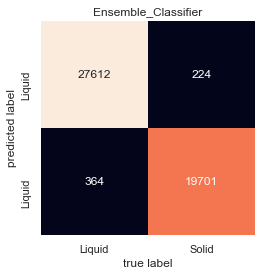

In [165]:
from sklearn.metrics import confusion_matrix

predicted_prob = voting_clf.predict_proba(x_test.T)[:,1]
predicted_class = voting_clf.predict(x_test.T)

mat = confusion_matrix(y_test.T, predicted_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Liquid", "Solid"],
            yticklabels=["Solid", "Liquid"])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Ensemble_Classifier");
save_fig("Ensemble_Classifier")

In [166]:
print(classification_report(y_test.T, predicted_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27976
           1       0.98      0.99      0.99     19925

    accuracy                           0.99     47901
   macro avg       0.99      0.99      0.99     47901
weighted avg       0.99      0.99      0.99     47901



In [167]:
# calculate bier score
loss = brier_score_loss(y_test.T, predicted_prob)
naive1=sum(predicted_prob)/predicted_prob.shape[0]
naive1 
yhat = [naive1 for _ in range(len(predicted_prob))]
bs_ref= brier_score_loss(y_test.T, yhat)
bs = brier_score_loss(y_test.T, predicted_prob)
bs_skill=1-(bs/bs_ref)
bs_skill

0.9602464844707945

In [168]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [400]}
grid_search_cv_clf = GridSearchCV(RandomForestClassifier(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_clf.fit(x_train.T, y_train.T))
display(grid_search_cv_clf.best_estimator_)
y_pred = grid_search_cv_clf.predict(x_test.T)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
display(grid_search_cv_clf.score(x_test.T, y_test.T))

0.9882048391474082

Saving figure Random_Forest_Classifier


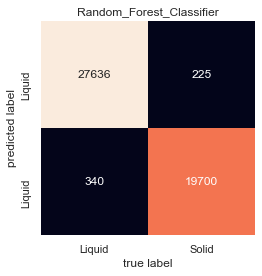

In [171]:
from sklearn.metrics import confusion_matrix

predicted_prob = grid_search_cv_clf.predict_proba(x_test.T)[:,1]
predicted_class = grid_search_cv_clf.predict(x_test.T)

mat = confusion_matrix(y_test.T, predicted_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Liquid", "Solid"],
            yticklabels=["Solid", "Liquid"])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Random_Forest_Classifier");
save_fig("Random_Forest_Classifier")

In [172]:
# calculate bier score
loss = brier_score_loss(y_test.T, predicted_prob)
naive1=sum(predicted_prob)/predicted_prob.shape[0]
naive1 
yhat = [naive1 for _ in range(len(predicted_prob))]
bs_ref= brier_score_loss(y_test.T, yhat)
bs = brier_score_loss(y_test.T, predicted_prob)
bs_skill=1-(bs/bs_ref)
bs_skill

0.9614968249887889

Saving figure feature_importance


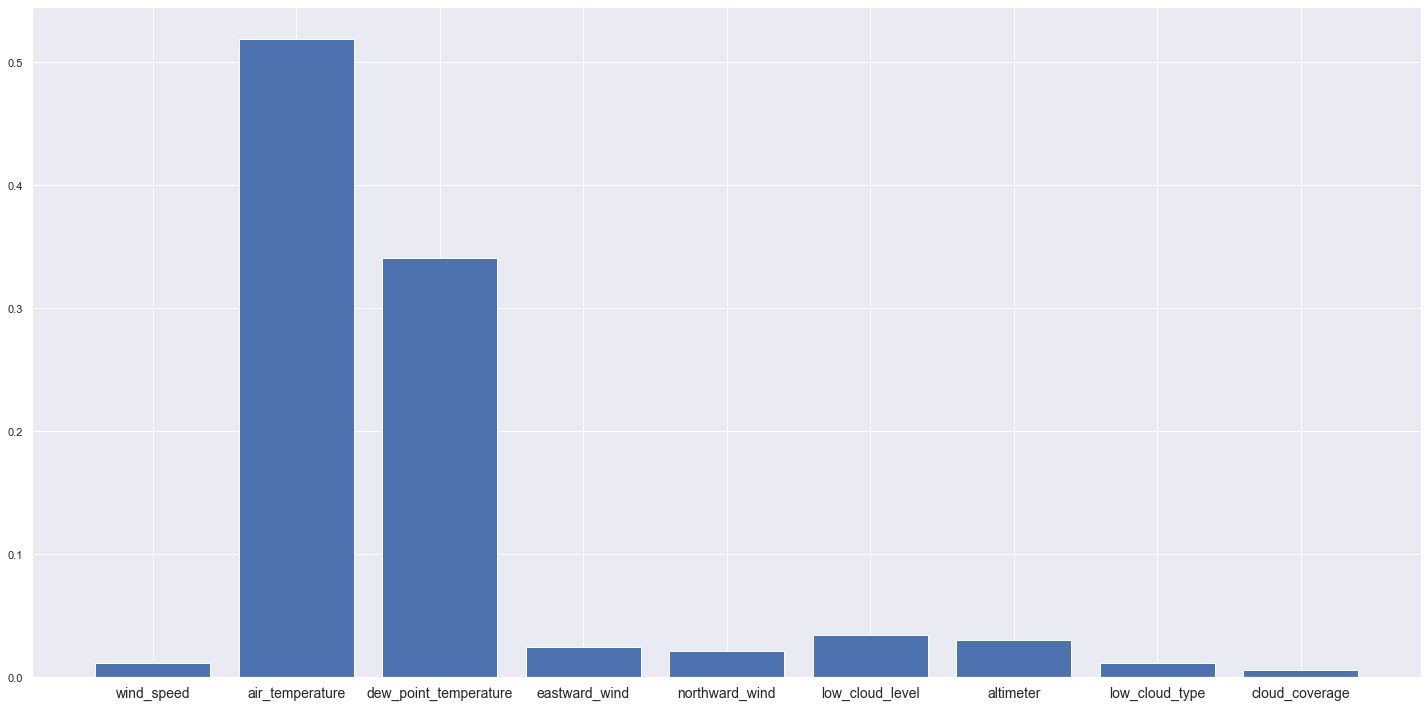

In [183]:
x_bar = ['wind_speed', 'air_temperature', 'dew_point_temperature', 'eastward_wind', 'northward_wind', 'low_cloud_level', 'altimeter', 'low_cloud_type', 'cloud_coverage']
y_bar = grid_search_cv_clf.best_estimator_.feature_importances_
plt.figure(figsize=(20,10))
plt.bar(x_bar, y_bar)
plt.xticks(fontsize=14)
plt.
save_fig("feature_importances")

In [153]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200, 300, 400, 500]}
grid_search_cv_clf = GridSearchCV(ExtraTreesClassifier(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_clf.fit(x_train.T, y_train.T))
display(grid_search_cv_clf.best_estimator_)
y_pred = grid_search_cv_clf.predict(x_test.T)

GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [154]:
display(grid_search_cv_clf.score(x_test.T, y_test.T))

0.9887267489196467

                Predicted NO SNOW  Predicted SNOW  Total
Actual NO SNOW              27661             315  27976
Actual SNOW                   225           19700  19925
Total                       27886           20015  47901


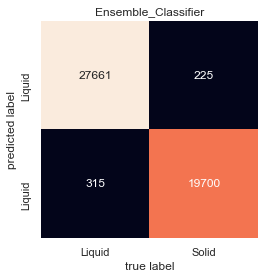

In [156]:
from sklearn.metrics import confusion_matrix

predicted_prob = grid_search_cv_clf.predict_proba(x_test.T)[:,1]
predicted_class = grid_search_cv_clf.predict(x_test.T)

mat = confusion_matrix(y_test.T, predicted_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Liquid", "Solid"],
            yticklabels=["Solid", "Liquid"])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Extra_Tree_Classifier");

In [157]:
# calculate bier score
loss = brier_score_loss(y_test.T, predicted_prob)
naive1=sum(predicted_prob)/predicted_prob.shape[0]
naive1 
yhat = [naive1 for _ in range(len(predicted_prob))]
bs_ref= brier_score_loss(y_test.T, yhat)
bs = brier_score_loss(y_test.T, predicted_prob)
bs_skill=1-(bs/bs_ref)
bs_skill

0.961266924873859

## PCA

## SVM